#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



#LOAD THE DATASET

In [3]:
# Load the dataset
url = 'https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python'
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


#DATA PREPROCESSING

In [4]:
# Check for missing values
print(data.isnull().sum())

# Drop the 'CustomerID' column as it is not needed for clustering
data = data.drop('CustomerID', axis=1)

# Encode the 'Gender' column to numerical values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Display the first few rows of the preprocessed dataset
print(data.head())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


#DATA STANDARDIZATION

In [5]:
# Standardize the features to have mean = 0 and variance = 1
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Display the scaled data
print(data_scaled[:5])


[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]]


#FINDING THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

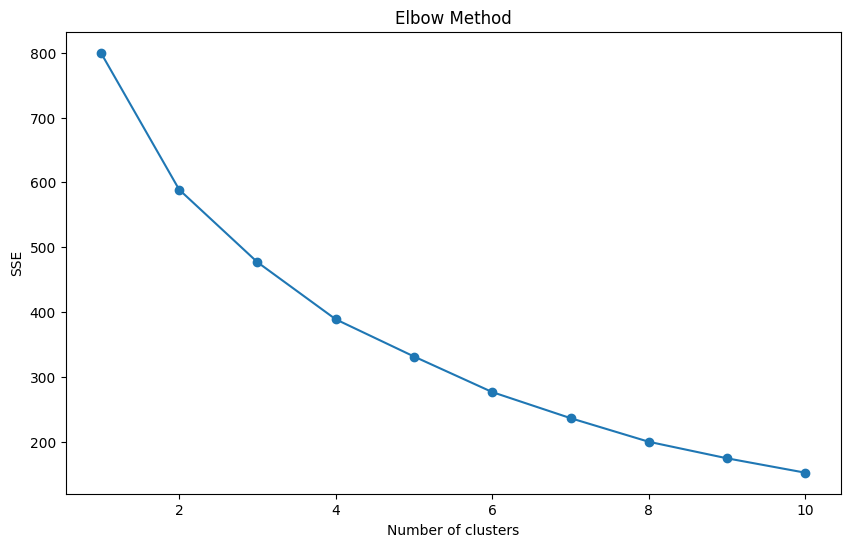

In [6]:
# Use the Elbow Method to find the optimal number of clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


#APPLYING K-MEAN CLUSTERING

In [7]:
# From the Elbow plot, select the optimal number of clusters (e.g., k = 5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Assign the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Display the first few rows with the cluster labels
print(data.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        3
1       0   21                  15                      81        3
2       1   20                  16                       6        3
3       1   23                  16                      77        3
4       1   31                  17                      40        3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#VISUALIZING THE CLUSTERS

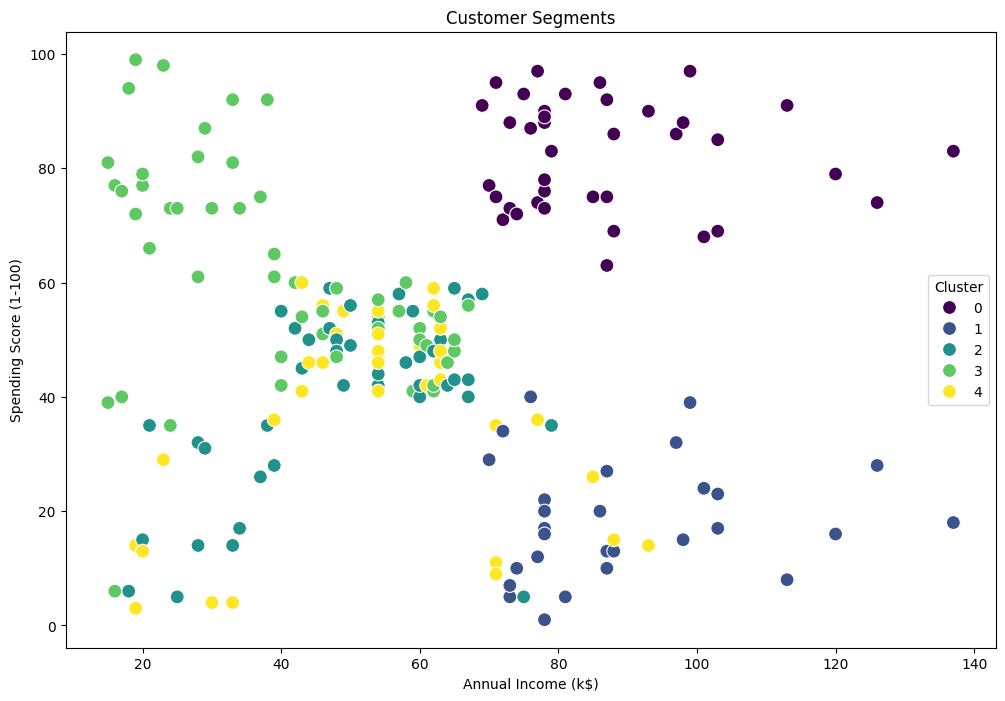

In [8]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=data, s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


#Evaluating the Clustering using Silhouette Score

In [9]:
# Calculate the silhouette score to evaluate the clustering
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.3040600988258827


#SUMMARY AND INSIGHTS

In [10]:
# Analyze the cluster centers to understand customer segments
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])

# Add the cluster label column
cluster_centers_df['Cluster'] = range(k)
print(cluster_centers_df)


     Gender        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  0.538462  32.692308           86.538462               82.128205        0
1  0.551724  36.482759           89.517241               18.000000        1
2  1.000000  49.813953           49.232558               40.069767        2
3  0.592593  24.907407           39.722222               61.203704        3
4  0.000000  55.714286           53.685714               36.771429        4


#SAVED THE CLUSTERED DATA

In [11]:
data.to_csv('Clustered_Customers.csv', index=False)
